# Group Project: Group_24

In [9]:
#Load Necessary Packages for modelling.
library(tidyverse)
library(repr)
library(tidymodels)
library("readxl")
install.packages("expss")
library(expss)

also installing the dependencies ‘checkmate’, ‘foreign’, ‘htmlTable’, ‘matrixStats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘expss’


The following object is masked from ‘package:recipes’:

    fixed


The following object is masked from ‘package:infer’:

    calculate


The following objects are masked from ‘package:stringr’:

    fixed, regex


The following objects are masked from ‘package:dplyr’:

    between, compute, contains, first, last, na_if, recode, vars


The following objects are masked from ‘package:purrr’:

    keep, modify, modify_if, transpose, when


The following objects are masked from ‘package:tidyr’:

    contains, nest


The following object is masked from ‘package:ggplot2’:

    vars




## 1. Introduction

## 2. Methods


### 2.1 Importing Data

We use the following code to import our dataset from the web:

In [4]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
download.file(url, "data.zip")
unzip("data.zip")
beans_raw <- read_excel('./DryBeanDataset/Dry_Bean_Dataset.xlsx')
head(beans_raw)

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


### 2.2 Data Cleaning

Our raw data is already almost tidy. After confirming there are no missing values, all we need to do is change the type of the class varible from a character to a factor, clean up the varible names, and select only the varibles we will be using.

In [5]:
beans_raw %>%
  map(sum(is.na(.)))

beans_clean <- beans_raw %>%
                mutate(Class = as_factor(Class), Roundness = roundness, AspectRatio = AspectRation) %>%
                select(Class, Area, Perimeter, AspectRatio, Compactness, Roundness)
head(beans_clean)

$Area
NULL

$Perimeter
NULL

$MajorAxisLength
NULL

$MinorAxisLength
NULL

$AspectRation
NULL

$Eccentricity
NULL

$ConvexArea
NULL

$EquivDiameter
NULL

$Extent
NULL

$Solidity
NULL

$roundness
NULL

$Compactness
NULL

$ShapeFactor1
NULL

$ShapeFactor2
NULL

$ShapeFactor3
NULL

$ShapeFactor4
NULL

$Class
NULL

Class,Area,Perimeter,AspectRatio,Compactness,Roundness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEKER,28395,610.291,1.197191,0.9133578,0.9580271
SEKER,28734,638.018,1.097356,0.9538608,0.8870336
SEKER,29380,624.110,1.209713,0.9087742,0.9478495
SEKER,30008,645.884,1.153638,0.9283288,0.9039364
SEKER,30140,620.134,1.060798,0.9705155,0.9848771
SEKER,30279,634.927,1.171067,0.9237260,0.9438518


### 2.3 Spliting Data into Training and Testing Datasets

Before we proceed with exploratory data analysis, we need to split our data into testing and training data, with 75% of the data in the training set and 25% in the testing. For the following steps we will only use our training data, setting aside the testing data to use to test the validity and accuracy of our model later.

75% training set split guarantees that the classification model has enough data to train while at the same time leaves enough testing data to verify the effectiveness of the model.

In [7]:
#random seed to ensure that the same split is done each time
set.seed(1234)

beans_split <- initial_split(beans_clean, prop=0.75, strata = Class)
beans_train <- training(beans_split)
beans_test <- testing(beans_split)

### 2.4 Exploratory Data Analysis

We now create some preliminary figures to explore the characteristics of our dataset. The table created below presents summary statistics about the predictor varibles, inculding minimum, maximum, mean and median values as well as the standard deviation for our five predictor varibles. 

In [10]:
summary_data <- beans_train %>%
                select(Area:Roundness) %>%
                apply_labels(Area = "Area",
                            Perimeter = "Perimeter",
                            AspectRatio = "Aspect Ratio",
                            Compactness = "Compactness",
                            Roundness = "Roundness")
                             
summary_table <- summary_data %>%
                 tab_cells(Area, Perimeter, AspectRatio, Compactness, Roundness) %>%
                 tab_cols(total(label = "Summary Statistics")) %>% 
                 tab_stat_fun(Max = w_max, Min = w_min, Mean = w_mean, "Median" = w_median, "Standand Deviation " = w_sd, method = list) %>%
                 tab_pivot()
summary_table

|              | Summary Statistics |         |         |         |                     |
 |              |                Max |     Min |    Mean |  Median | Standand Deviation  |
 | ------------ | ------------------ | ------- | ------- | ------- | ------------------- |
 |         Area |           254616.0 | 20420.0 | 52951.8 | 44675.0 |             29148.4 |
 |    Perimeter |             1985.4 |   524.7 |   854.6 |   794.9 |               213.3 |
 | Aspect Ratio |                2.4 |     1.0 |     1.6 |     1.6 |                 0.2 |
 |  Compactness |                1.0 |     0.6 |     0.8 |     0.8 |                 0.1 |
 |    Roundness |                1.0 |     0.5 |     0.9 |     0.9 |                 0.1 |

We also plot the estimated probability density functions of our predictor varibles to see how their distributions vary between the different classes. Before we do this we will center and scale the predictors so that we can make easier comparisions between the differnt predictors.

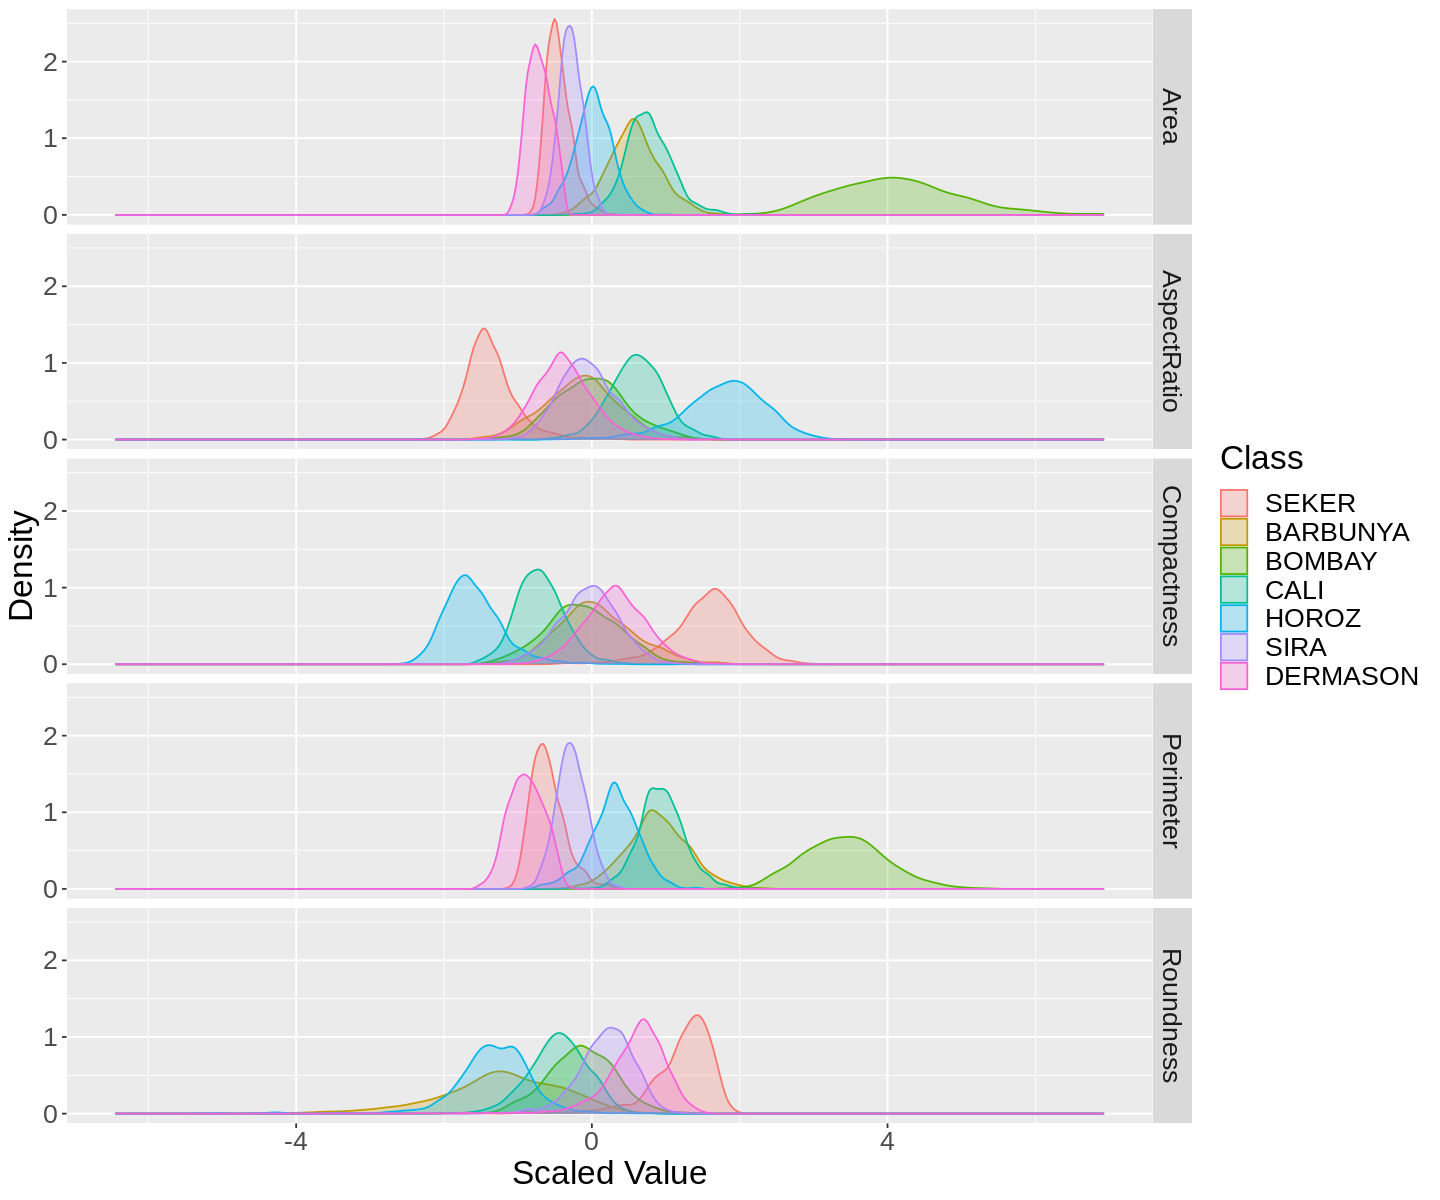

In [11]:
#center and scale all the predictor varibles to allow comparisons across metrics 
scaling_recipe <- recipe(Class ~ ., data = beans_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()

scaled_beans <- bake(scaling_recipe, beans_train)

#reshape data for visulization
expor_plot_data <- scaled_beans %>%
                    pivot_longer(cols = Area:Roundness,
                                 names_to = "predictor",
                                 values_to = "value")

#create density plot
options(repr.plot.width=12, repr.plot.height=10)

expor_plot <- ggplot(expor_plot_data,aes(x=value, fill=Class, colour = Class)) + 
                facet_grid(rows = ggplot2::vars(predictor))+
                geom_density(alpha=0.25)+
                labs(x = "Scaled Value",
                     y = "Density")+
                theme(text = element_text(size = 20))
expor_plot

### 2.5 Training the Classifier Cross-Validation



In [34]:
vfold <- vfold_cv(beans_train, v = 5, strata = Class)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_results <- workflow() %>%
  add_recipe(scaling_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

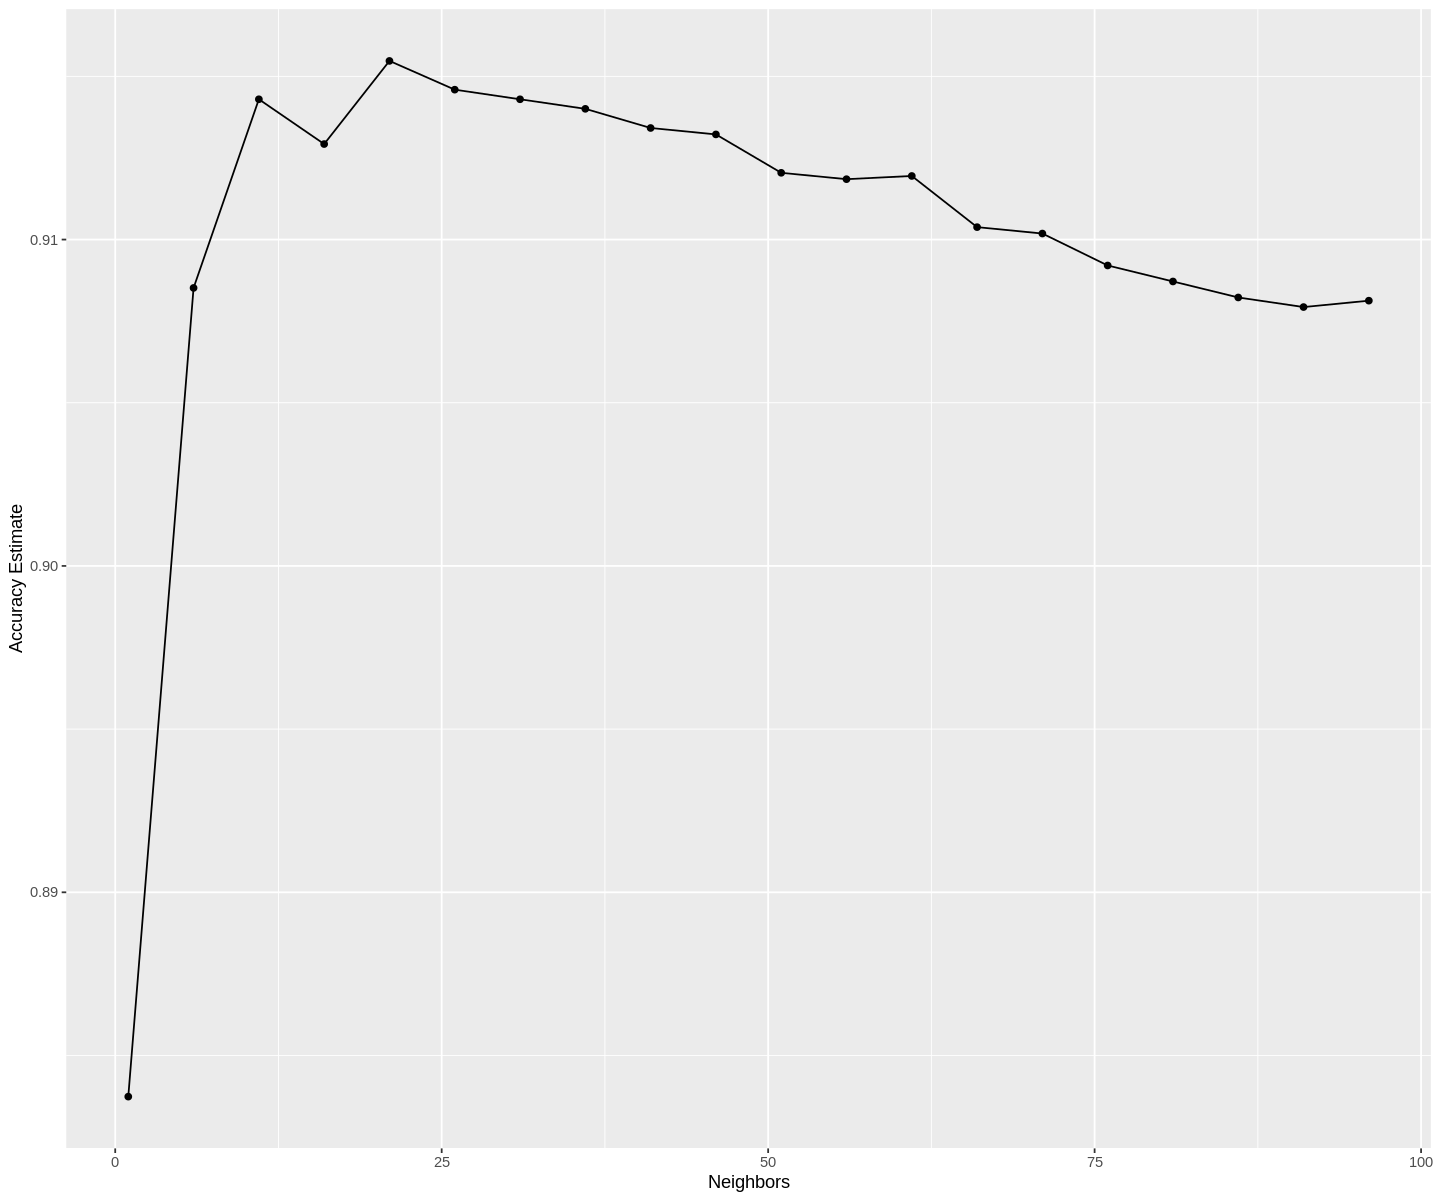

In [36]:
options(repr.plot.width=12, repr.plot.height=10)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_vs_k

In [38]:
kmax <- accuracies %>%
  filter(mean == max(mean))%>%
  pull(neighbors)

kmax

[1] 21

In [42]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmax) %>%
            set_engine("kknn") %>%
            set_mode("classification")

beans_fit <- workflow() %>%
  add_recipe(scaling_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = beans_train)

beans_summary <- beans_fit %>%
  predict(beans_test) %>%
  bind_cols(beans_test) %>%
  metrics(truth = Class, estimate = .pred_class) %>%
  filter(.metric == "accuracy")

beans_accuracy <- beans_summary %>%
                select(.estimate) %>%
                pull()

beans_accuracy

[1] 0.9179653